<a href="https://colab.research.google.com/github/singhmansi25/EDA-Project-2022/blob/main/EDA_Project_Fire_Incidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Required Libraries**

In [1]:
# library used for data manipulation & analysis 
import pandas as pd   
# library used for working with arrays & linear algebra
import numpy as np
# library used for data visualisation 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
# library used for statistics & mathematical calculation
import statistics
import scipy.stats as stats
# library used for date time conversion
from datetime import datetime

## **Loading the Dataset**

In [2]:
fire_df = pd.read_csv('/content/drive/MyDrive/Fire-Incidents.csv')

## **Reading the Dataset**

In [5]:
# reading first 5 rows of dataset
fire_df.head()

,Area_of_Origin,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Ext_agent_app_or_defer_time,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,...,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time
0,Porch or Balcony,No business interruption,0,86,3000,0,2018-08-24T17:06:26,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system did not operate,...,-79.412479,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with smoke showing only - including vehic...,2018-08-24T16:49:36,2018-08-24T16:54:09
1,Cooking Area or Kitchen,Undetermined,0,28,50000,28,2018-11-24T07:19:00,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operated,...,-79.530419,Plastic,Extinguished by occupant,Under Investigation,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-11-24T07:09:12,2018-11-24T07:14:23
2,"Living Area (e.g. living, TV, recreation, etc)",Not applicable (not a business),1,16,1000000,130,2017-02-09T18:02:13,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,...,-79.373460,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Flames showing from small area (one storey or ...,2017-02-09T17:45:07,2017-02-09T17:48:49
3,Undetermined (formerly 98),May not resume operations,0,12,1000000,14,2012-10-30T00:52:04,Entire Structure,Undetermined,Fire alarm system operation undetermined,...,-79.393700,Undetermined (formerly 98),Extinguished by fire department,Undetermined,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,Flames showing from large area (more than one ...,2012-10-30T00:42:01,2012-10-30T00:44:58
4,"Sleeping Area or Bedroom (inc. patients room, ...",Not applicable (not a business),8,11,125000,2,2018-07-08T04:35:00,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,...,-79.511539,Bedding,Extinguished by fire department,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire with no evidence from street,2018-07-08T04:08:50,2018-07-08T04:13:54


In [4]:
# reading last 5 rows of dataset
fire_df.tail()

,Area_of_Origin,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Ext_agent_app_or_defer_time,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,...,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time
11209,"Trash, Rubbish Storage (inc garbage chute room...",No business interruption,0,0,0,0,2018-02-23T14:41:51,Confined to object of origin,All persons (at risk of injury) evacuated as a...,Fire alarm system operated,...,-79.373778,"Rubbish, Trash, Waste",Extinguished by automatic system,Improperly Discarded,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with no evidence from street,2018-02-23T14:35:03,2018-02-23T14:38:33
11210,Other Storage Area,No business interruption,0,0,1000,0,2018-02-24T01:42:03,Confined to object of origin,All persons (at risk of injury) evacuated as a...,Fire alarm system operated,...,-79.280725,Undetermined (formerly 98),Extinguished by occupant,Electrical Failure,General Business Office,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-02-24T01:30:45,2018-02-24T01:36:59
11211,Other Storage Area,No business interruption,0,0,0,0,2018-02-24T02:40:00,Confined to object of origin,All persons (at risk of injury) evacuated as a...,Fire alarm system operated,...,-79.280725,Electrical Wiring Insulation,Extinguished by occupant,"Other unintentional cause, not classified",General Business Office,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-02-24T02:30:33,2018-02-24T02:35:07
11212,Porch or Balcony,Not applicable (not a business),6,0,100000,1,2018-02-24T00:44:00,Confined to part of room/area of origin,All persons (at risk of injury) evacuated as a...,Fire alarm system operated,...,-79.500863,"Paper, Cardboard",Extinguished by fire department,Improperly Discarded,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Battery operated,Flames showing from small area (one storey or ...,2018-02-24T00:34:12,2018-02-24T00:38:47
11213,"Trash, Rubbish Storage (inc garbage chute room...",No business interruption,0,0,100,0,2018-02-24T08:33:18,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system did not operate,...,-79.589233,"Rubbish, Trash, Waste",Extinguished by fire department,Improperly Discarded,Hardware Store,Not applicable: Alarm operated OR presence/ope...,Type undetermined,Fire with no evidence from street,2018-02-24T08:22:30,2018-02-24T08:27:21


In [6]:
# finding shape of dataset
fire_df.shape

(11214, 27)

The Dataset has:

    Number of Rows:      11214
    Number of Columns:   27

In [7]:
# finding information about columns present in dataset
fire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11214 entries, 0 to 11213
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Area_of_Origin                            11214 non-null  object 
 1   Business_Impact                           11214 non-null  object 
 2   Civilian_Casualties                       11214 non-null  int64  
 3   Count_of_Persons_Rescued                  11214 non-null  int64  
 4   Estimated_Dollar_Loss                     11214 non-null  int64  
 5   Estimated_Number_Of_Persons_Displaced     11214 non-null  int64  
 6   Ext_agent_app_or_defer_time               11214 non-null  object 
 7   Extent_Of_Fire                            11214 non-null  object 
 8   Fire_Alarm_System_Impact_on_Evacuation    11214 non-null  object 
 9   Fire_Alarm_System_Operation               11214 non-null  object 
 10  Fire_Alarm_System_Presence        

The Dataset has:
    
    Number of column with Float type variable:    3
    Number of column with Int type variable:      5
    Number of column with Object type variable:   19

But we see that Columns with Date & Time values are in object format. Let's change it into date-time format.

### **Converting Timestamp to Date Time format**

The timestamps are string values and need to be converted to datetime objects to do feature engineering.

In [8]:
# Converting Columns in object type to Date-time format.
fire_df['Ext_agent_app_or_defer_time'] = pd.to_datetime(fire_df['Ext_agent_app_or_defer_time'])
fire_df['Fire_Under_Control_Time'] = pd.to_datetime(fire_df['Fire_Under_Control_Time'])
fire_df['Last_TFS_Unit_Clear_Time'] = pd.to_datetime(fire_df['Last_TFS_Unit_Clear_Time'])
fire_df['TFS_Alarm_Time'] = pd.to_datetime(fire_df['TFS_Alarm_Time'])
fire_df['TFS_Arrival_Time'] = pd.to_datetime(fire_df['TFS_Arrival_Time'])

In [9]:
# finding information about columns present in dataset
fire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11214 entries, 0 to 11213
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Area_of_Origin                            11214 non-null  object        
 1   Business_Impact                           11214 non-null  object        
 2   Civilian_Casualties                       11214 non-null  int64         
 3   Count_of_Persons_Rescued                  11214 non-null  int64         
 4   Estimated_Dollar_Loss                     11214 non-null  int64         
 5   Estimated_Number_Of_Persons_Displaced     11214 non-null  int64         
 6   Ext_agent_app_or_defer_time               11214 non-null  datetime64[ns]
 7   Extent_Of_Fire                            11214 non-null  object        
 8   Fire_Alarm_System_Impact_on_Evacuation    11214 non-null  object        
 9   Fire_Alarm_System_Operation 

The Dataset has:
    
    Number of column with Float type variable:      3
    Number of column with Int type variable:        5
    Number of column with Datetime type variable:   5
    Number of column with Object type variable:     14

## **Inspecting Null Columns**

In [10]:
# finding columns with null values
fire_df.isnull().sum()

Area_of_Origin                               0
Business_Impact                              0
Civilian_Casualties                          0
Count_of_Persons_Rescued                     0
Estimated_Dollar_Loss                        0
Estimated_Number_Of_Persons_Displaced        0
Ext_agent_app_or_defer_time                  0
Extent_Of_Fire                               0
Fire_Alarm_System_Impact_on_Evacuation       0
Fire_Alarm_System_Operation                  0
Fire_Alarm_System_Presence                   0
Fire_Under_Control_Time                      0
Ignition_Source                              0
Incident_Station_Area                        0
Incident_Ward                               33
Last_TFS_Unit_Clear_Time                     0
Latitude                                     0
Longitude                                    0
Material_First_Ignited                       0
Method_Of_Fire_Control                       0
Possible_Cause                               0
Property_Use 

## **Handling Null Values**

As only Column 'Incident Ward' has null values, let's inspect this column. 

In [11]:
# analysing unique values in the column.
fire_df['Incident_Ward'].unique()

array([18.,  7., 27., 20.,  5., 15., 14., 17., 29.,  9.,  8., 42., 22.,
       36., 43.,  1., 28., 33., 24., 35., 37., 30., 34., 11., 10.,  6.,
       21.,  4., 19., 26., 44., 32., 23., 25., 38., 31.,  2., 13., 12.,
       16.,  3., 40., 41., nan, 39.])

As Incident Ward column signifies Ward code of the area where the incident occurred, we can replace null values with 0.

In [12]:
# replacing null values 0
fire_df['Incident_Ward'].fillna(0, inplace=True)

In [13]:
# again calculating number of null values in each column
fire_df.isnull().sum()

Area_of_Origin                              0
Business_Impact                             0
Civilian_Casualties                         0
Count_of_Persons_Rescued                    0
Estimated_Dollar_Loss                       0
Estimated_Number_Of_Persons_Displaced       0
Ext_agent_app_or_defer_time                 0
Extent_Of_Fire                              0
Fire_Alarm_System_Impact_on_Evacuation      0
Fire_Alarm_System_Operation                 0
Fire_Alarm_System_Presence                  0
Fire_Under_Control_Time                     0
Ignition_Source                             0
Incident_Station_Area                       0
Incident_Ward                               0
Last_TFS_Unit_Clear_Time                    0
Latitude                                    0
Longitude                                   0
Material_First_Ignited                      0
Method_Of_Fire_Control                      0
Possible_Cause                              0
Property_Use                      

## **Analysing Numerical Columns**

In [14]:
# describing the mathematical features of Numerical Columns using count, mean, standard deviation, minimum value, maximum value,
# 25th, 50th, 75th percentile values.
fire_df.describe()

,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Incident_Station_Area,Incident_Ward,Latitude,Longitude
count,11214.000000,11214.000000,1.121400e+04,11214.000000,11214.000000,11214.000000,11214.000000,11214.000000
mean,0.112538,0.062154,4.294369e+04,17.274835,288.281880,19.525058,43.705190,-79.403323
std,0.456429,0.962587,5.339367e+05,119.071696,107.515995,11.793265,0.051183,0.101086
min,0.000000,0.000000,0.000000e+00,0.000000,111.000000,0.000000,43.588926,-79.635241
25%,0.000000,0.000000,2.500000e+02,0.000000,221.000000,9.250000,43.662474,-79.479273
50%,0.000000,0.000000,2.500000e+03,0.000000,314.000000,19.000000,43.697050,-79.403892
75%,0.000000,0.000000,1.500000e+04,1.000000,346.000000,28.000000,43.747770,-79.337150
max,15.000000,86.000000,5.000000e+07,999.000000,445.000000,44.000000,43.846200,-79.124410


In [15]:
# describing the mathematical features of Numerical Columns using mean, median, most common, least common, variance, 
# standard deviation, minimum value, maximum value, skew, kurtosis, mean absolute deviation to understand in better way
# by creating a dictionary of columns and their related numerical features.
explore_dict = {
    'Mean' : [fire_df.Civilian_Casualties.mean(), fire_df.Count_of_Persons_Rescued.mean(), 
                fire_df.Estimated_Dollar_Loss.mean(), fire_df.Estimated_Number_Of_Persons_Displaced.mean(), 
                fire_df.Incident_Station_Area.mean(), fire_df.Incident_Ward.mean()],
    
    'Median' : [statistics.median(fire_df.Civilian_Casualties), statistics.median(fire_df.Count_of_Persons_Rescued),
                statistics.median(fire_df.Estimated_Dollar_Loss), statistics.median(fire_df.Estimated_Number_Of_Persons_Displaced),
                statistics.median(fire_df.Incident_Station_Area), statistics.median(fire_df.Incident_Ward)],
    
    'Min Value' : [fire_df.Civilian_Casualties.min(), fire_df.Count_of_Persons_Rescued.min(), 
                   fire_df.Estimated_Dollar_Loss.min(), fire_df.Estimated_Number_Of_Persons_Displaced.min(), 
                   fire_df.Incident_Station_Area.min(), fire_df.Incident_Ward.min()],
    
    'Max Value' : [fire_df.Civilian_Casualties.max(), fire_df.Count_of_Persons_Rescued.max(), 
                   fire_df.Estimated_Dollar_Loss.max(), fire_df.Estimated_Number_Of_Persons_Displaced.max(), 
                   fire_df.Incident_Station_Area.max(), fire_df.Incident_Ward.max()],
    
    'Most Common' : [fire_df.Civilian_Casualties.value_counts().idxmax(), fire_df.Count_of_Persons_Rescued.value_counts().idxmax(), 
                           fire_df.Estimated_Dollar_Loss.value_counts().idxmax(), fire_df.Estimated_Number_Of_Persons_Displaced.value_counts().idxmax(), 
                           fire_df.Incident_Station_Area.value_counts().idxmax(), fire_df.Incident_Ward.value_counts().idxmax()],
    
    'Least Common' : [fire_df.Civilian_Casualties.value_counts().idxmin(), fire_df.Count_of_Persons_Rescued.value_counts().idxmin(), 
                            fire_df.Estimated_Dollar_Loss.value_counts().idxmin(), fire_df.Estimated_Number_Of_Persons_Displaced.value_counts().idxmin(), 
                            fire_df.Incident_Station_Area.value_counts().idxmin(), fire_df.Incident_Ward.value_counts().idxmin()],
    
    'Variance' : [statistics.variance(fire_df.Civilian_Casualties), statistics.variance(fire_df.Count_of_Persons_Rescued),
                statistics.variance(fire_df.Estimated_Dollar_Loss), statistics.variance(fire_df.Estimated_Number_Of_Persons_Displaced),
                statistics.variance(fire_df.Incident_Station_Area), statistics.variance(fire_df.Incident_Ward)],
    
    'St. Dev' : [statistics.stdev(fire_df.Civilian_Casualties), statistics.stdev(fire_df.Count_of_Persons_Rescued),
                 statistics.stdev(fire_df.Estimated_Dollar_Loss), statistics.stdev(fire_df.Estimated_Number_Of_Persons_Displaced),
                 statistics.stdev(fire_df.Incident_Station_Area), statistics.stdev(fire_df.Incident_Ward)],
    
    'Skew' : [fire_df.Civilian_Casualties.skew(), fire_df.Count_of_Persons_Rescued.skew(), 
              fire_df.Estimated_Dollar_Loss.skew(), fire_df.Estimated_Number_Of_Persons_Displaced.skew(), 
              fire_df.Incident_Station_Area.skew(), fire_df.Incident_Ward.skew()],
    
    'Kurtosis' : [fire_df.Civilian_Casualties.kurt(), fire_df.Count_of_Persons_Rescued.kurt(), 
                  fire_df.Estimated_Dollar_Loss.kurt(), fire_df.Estimated_Number_Of_Persons_Displaced.kurt(), 
                  fire_df.Incident_Station_Area.kurt(), fire_df.Incident_Ward.kurt()],
    
    'Mean Absolute Deviation' : [fire_df.Civilian_Casualties.mad(), fire_df.Count_of_Persons_Rescued.mad(), 
                                 fire_df.Estimated_Dollar_Loss.mad(), fire_df.Estimated_Number_Of_Persons_Displaced.mad(), 
                                 fire_df.Incident_Station_Area.mad(), fire_df.Incident_Ward.mad()],
}


In [16]:
# creating a dataframe from dictionary
explore_df = pd.DataFrame(explore_dict, index = ['Civilian Casualties', 'Count of persons rescued',
                                                 'Estimated Dollar Loss', 'Estimated Number of Persons Displaced',
                                                 'Incident Station Area', 'Incident Ward'])
explore_df.head()

,Mean,Median,Min Value,Max Value,Most Common,Least Common,Variance,St. Dev,Skew,Kurtosis,Mean Absolute Deviation
Civilian Casualties,0.112538,0.0,0.0,15.0,0.0,15.0,2.083276e-01,0.456429,8.455166,149.308247,0.205988
Count of persons rescued,0.062154,0.0,0.0,86.0,0.0,86.0,9.265744e-01,0.962587,67.355363,5747.892245,0.120684
Estimated Dollar Loss,42943.693419,2500.0,0.0,50000000.0,0.0,15600.0,2.850884e+11,533936.667426,76.107737,6892.877165,63425.666540
Estimated Number of Persons Displaced,17.274835,0.0,0.0,999.0,0.0,230.0,1.417807e+04,119.071696,7.929017,61.853362,31.293370
Incident Station Area,288.281880,314.0,111.0,445.0,426.0,346.0,1.155969e+04,107.515995,-0.154630,-1.215131,94.124758


The above statistics show that most values in civilian casualties, persons rescued, dollar loss and persons displaced fall close to 0.

The maximum values are much higher than the mean and median indicating a lot of outliers.

The data is already relatively clean however some cleaning is required:


*   The categorical columns have far too many categories and many of these categories have too few observations.

*   Outliers need to be removed







## **Categorical Data**

Analysing categorical columns by the unique values present in each column and to understand important features.


In [17]:
# Analysing Area of Origin column, to understand more fire accident prone areas.
fire_df['Area_of_Origin'].value_counts(normalize=True)*100

Cooking Area or Kitchen                                             25.593009
Porch or Balcony                                                     8.471553
Sleeping Area or Bedroom (inc. patients room, dormitory, etc)        7.740325
Trash, Rubbish Storage (inc garbage chute room, garbage/industri     6.696986
Living Area (e.g. living, TV, recreation, etc)                       5.296950
                                                                      ...    
Under Investigation                                                  0.044587
Running Gear (inc wheels and braking systems, transmission syste     0.035670
Incinerator Room                                                     0.026752
Records storage area (inc vaults)                                    0.017835
Fuel Dispensing Area (outside)                                       0.008917
Name: Area_of_Origin, Length: 73, dtype: float64

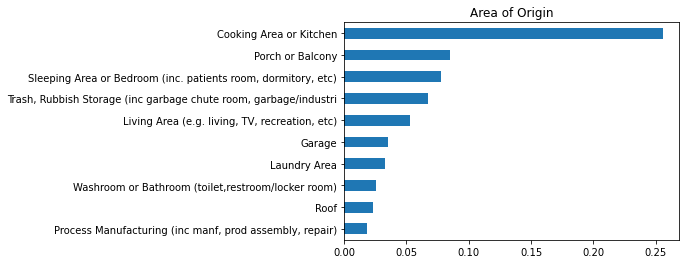

In [61]:
# Now we will plot a graph for top 10 values of area of origin
plt.title('Area of Origin')
fire_df['Area_of_Origin'].value_counts(normalize = True, ascending = True)[-10:].plot(kind='barh')
plt.show()

The column has unique values with the most common value being '**Cooking area or Kitchen**' representing 25.6% of entries.


In [62]:
# Analysing Business impact column, to understand if business were impacted due to fire and what were they?
fire_df['Business_Impact'].value_counts(normalize=True)*100

Not applicable (not a business)         45.514535
No business interruption                40.048154
Undetermined                             6.723738
May resume operations within a week      5.724987
May resume operations within a month     1.123596
May not resume operations                0.561798
May resume operations within a year      0.303192
Name: Business_Impact, dtype: float64

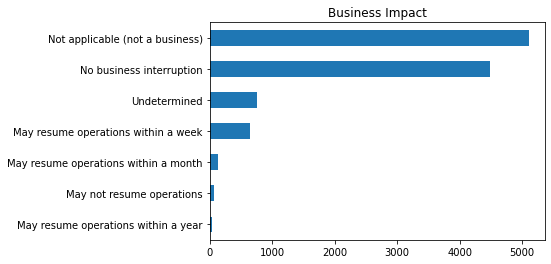

In [63]:
# Now we will plot a graph for top values for it.
plt.title('Business Impact')
fire_df['Business_Impact'].value_counts(ascending=True).plot(kind='barh')
plt.show()

**'Not applicable (no business)'** and **'No business interruption'** represents
86% of entries.

That is business was not impacted in 86% of the fire cases.